<a href="https://colab.research.google.com/github/JayeshTheCoder/Principal-Component-Analysis/blob/main/Principle_Component_Analysis_435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

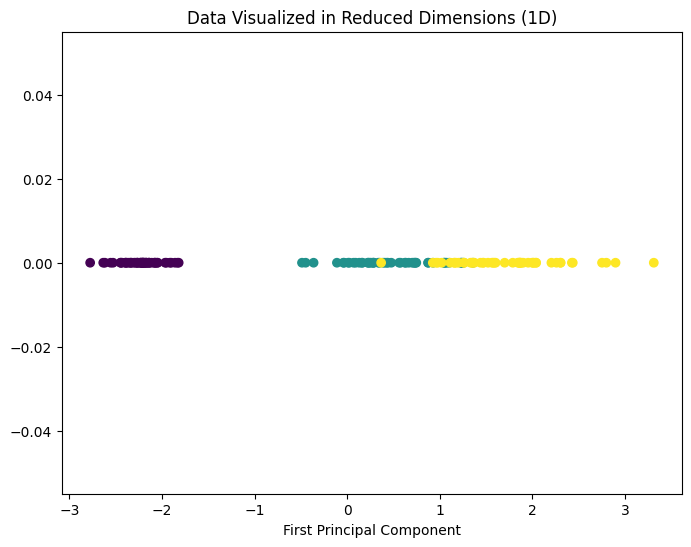

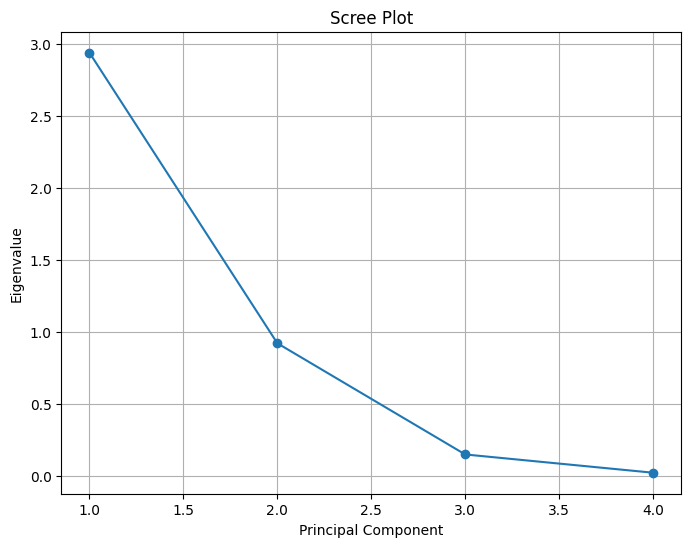

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

#IRIS DATASET
#https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length

# Step 1: Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
X = iris_df.iloc[:, :-1].values

# Step 2: Perform data normalization (z-score normalization)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Step 3: Determine covariance matrix
cov_matrix = np.cov(X_normalized.T)

# Step 4: Determine eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 5: Select the principal component and visualize it
# We'll select the first principal component
pc1 = eigenvectors[:, 0]

# Project the data onto the first principal component
projected_data = X_normalized.dot(pc1)

# Visualize the data in reduced dimensions (1D)
plt.figure(figsize=(8, 6))
plt.scatter(projected_data, np.zeros_like(projected_data), c=iris.target, cmap='viridis')
plt.xlabel('First Principal Component')
plt.title('Data Visualized in Reduced Dimensions (1D)')
plt.show()

# Step 6: Draw an elbow or scree plot
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='-')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


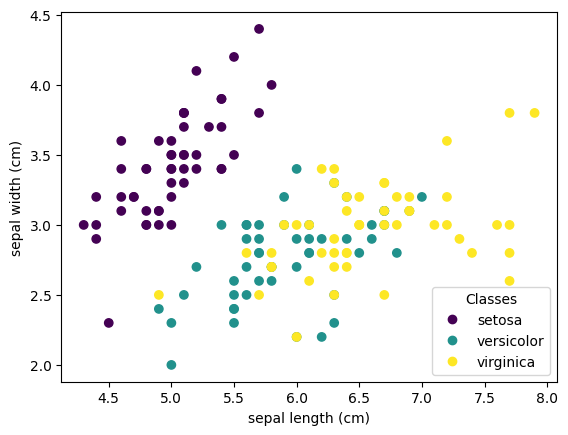

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

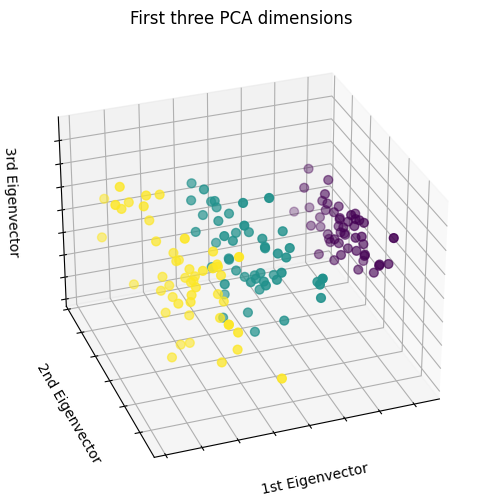

In [ ]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


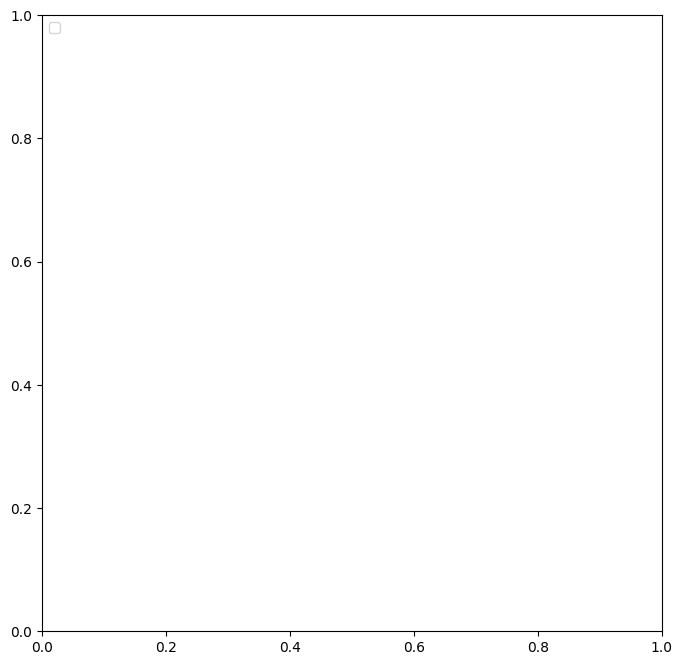

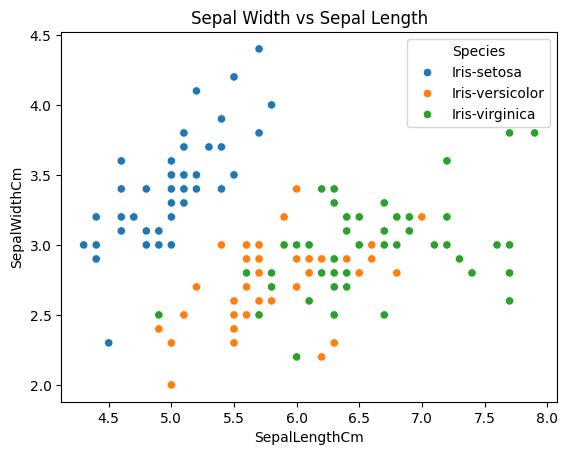

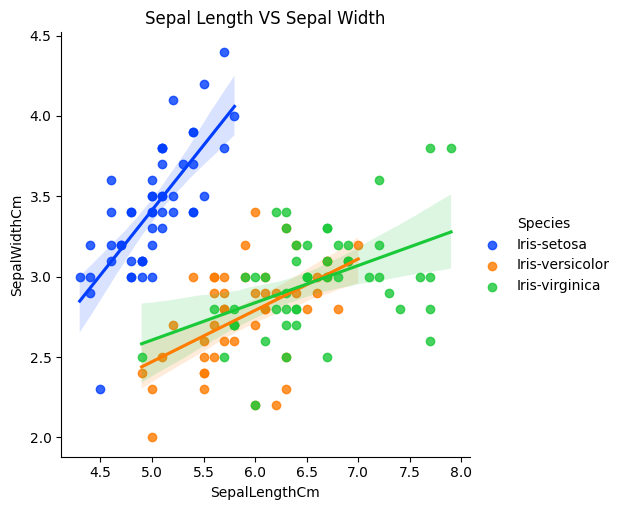

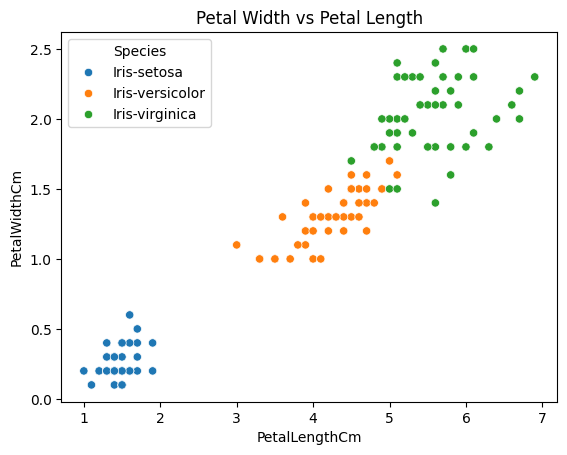

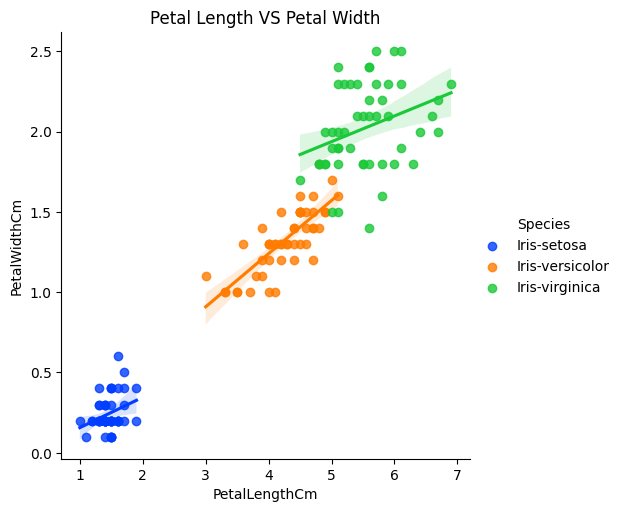

30

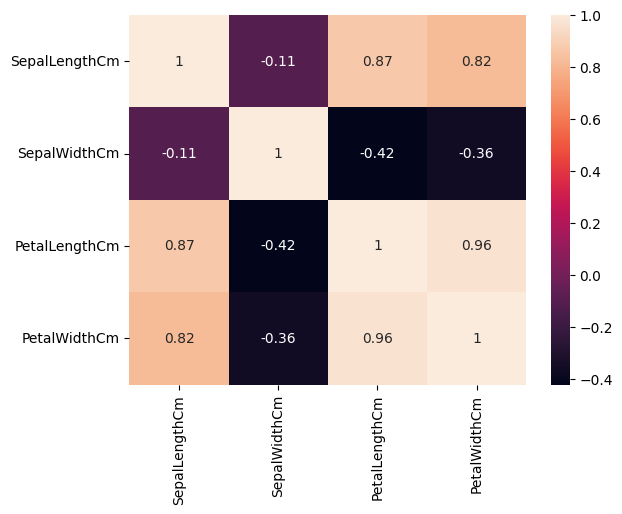

In [2]:
#IRIS DATASET
#LINK: https://www.kaggle.com/datasets/uciml/iris
#This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/Iris.csv')
df.shape
df.head()
df.tail()
df.info()
df.isna().sum()
df.duplicated().sum()
df.describe()
df.columns
df.drop(columns='Id',axis=1,inplace=True)
df.head()
Species = df['Species'].value_counts().reset_index()
Species
plt.figure(figsize=(8,8))
plt.legend(loc='upper left')
plt.show()
df.head()
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', data=df, hue='Species')
plt.title('Sepal Width vs Sepal Length')
plt.show()
sns.lmplot(
    x="SepalLengthCm",
    y="SepalWidthCm",
    hue="Species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df, hue='Species')
plt.title('Petal Width vs Petal Length')
plt.show()
sns.lmplot(
    x="PetalLengthCm",
    y="PetalWidthCm",
    hue="Species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS Petal Width")
plt.show()
newdf = df.drop(columns='Species',axis=1)
newdf.corr()
sns.heatmap(newdf.corr(), annot=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])
df.head()
X = df.drop(['Species'], axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
len(X_train)
len(X_test)
